#### ***Unsupervised Learning***

# Clustering

Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group and dissimilar to the data points in other groups. It is basically a collection of objects on the basis of similarity and dissimilarity between them.

## DBSCAN

Density-based spatial clustering of applications with noise (DBSCAN) is a well-known data clustering algorithm that is commonly used in data mining and machine learning.

Based on a set of points (let’s think in a bidimensional space as exemplified in the figure), DBSCAN groups together points that are close to each other based on a distance measurement (usually Euclidean distance) and a minimum number of points. It also marks as outliers the points that are in low-density regions.

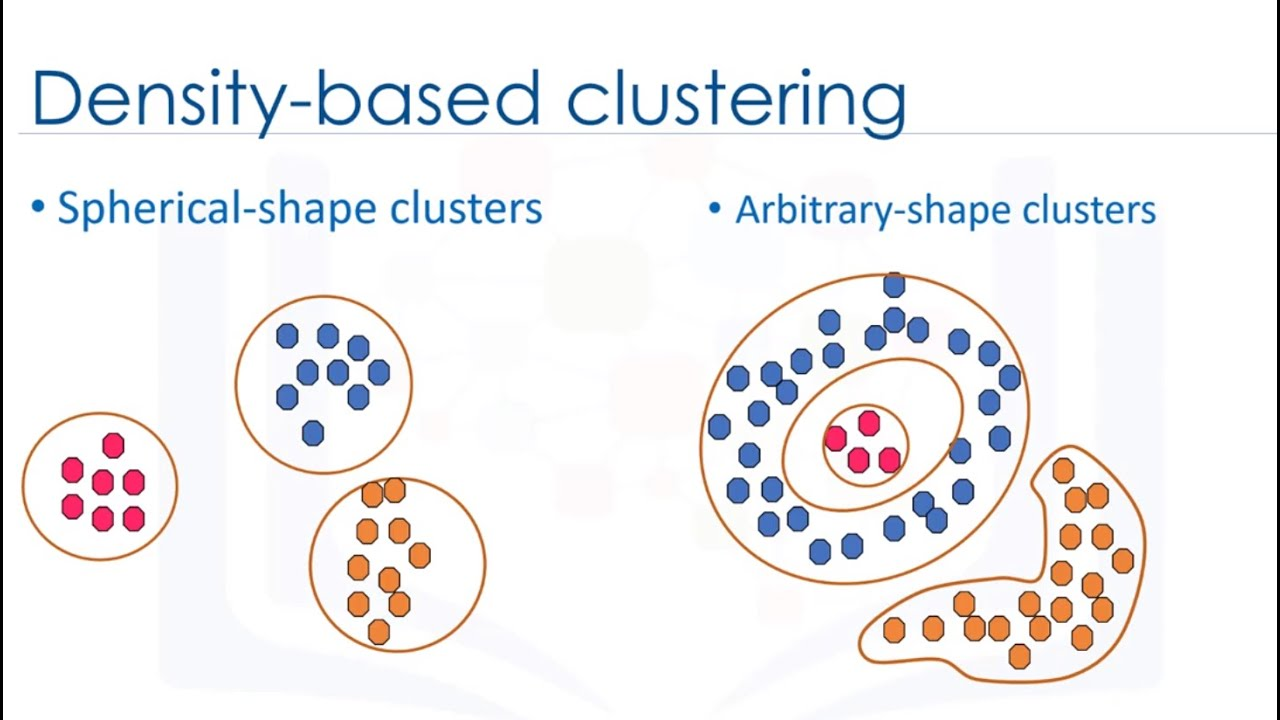
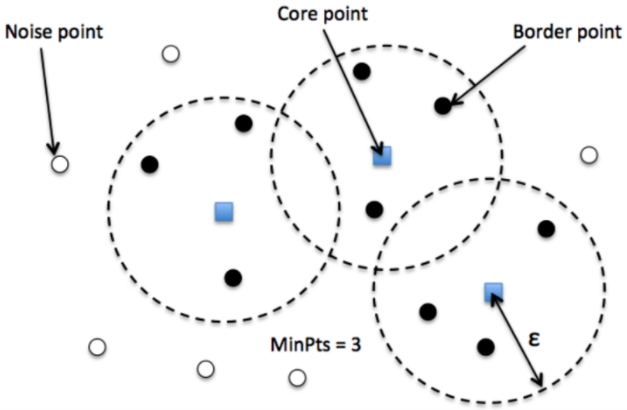

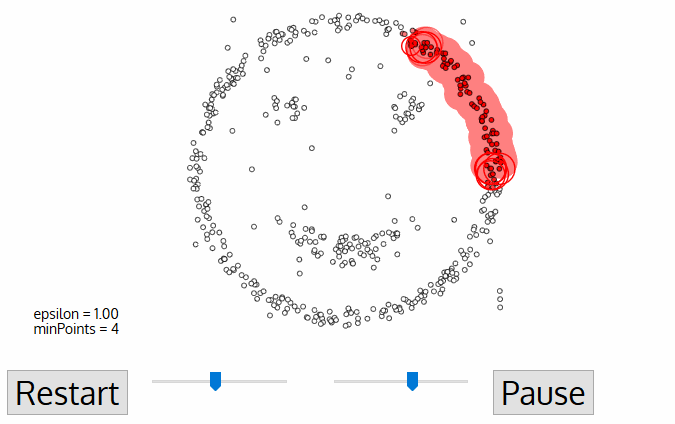

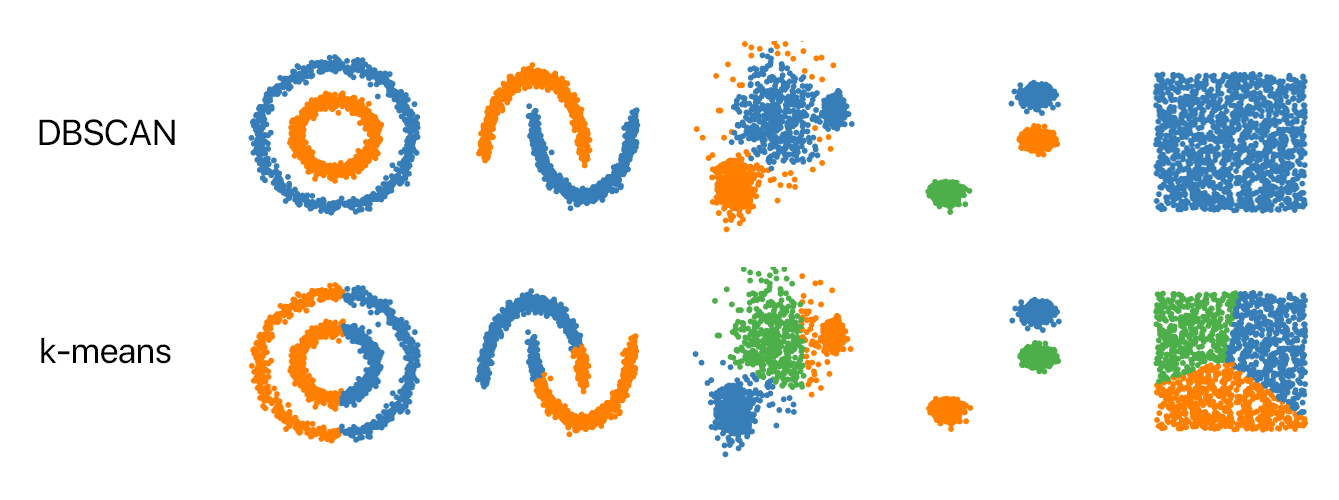

In [46]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn import datasets
import numpy as np

In [47]:
x, y = datasets.make_moons(n_samples=2500, noise=0.06)

x1 = x[:,0]
x2 = x[:,1]

In [48]:
x.shape

(2500, 2)

## Visualization

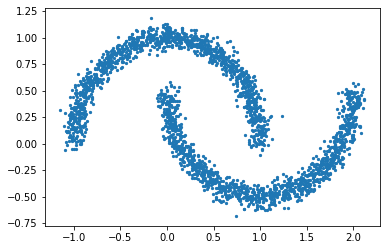

In [49]:
plt.scatter(x1, x2, s=5)
plt.show()

## Finding an Optimal value of Eps

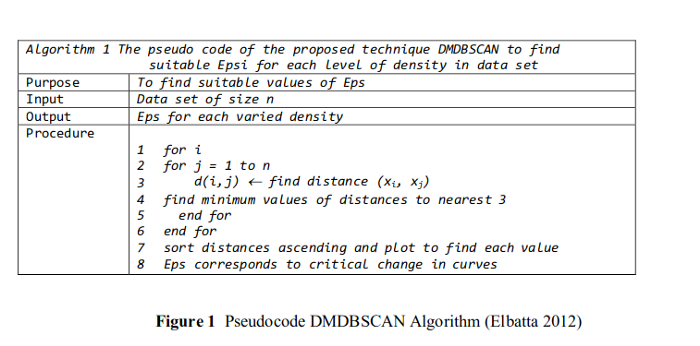

In [50]:
neighbor = NearestNeighbors(n_neighbors=2)
nbrs = neighbor.fit(x)
distances, indices = nbrs.kneighbors(x)

In [51]:
distances

array([[0.        , 0.01337482],
       [0.        , 0.01619314],
       [0.        , 0.00187263],
       ...,
       [0.        , 0.00491113],
       [0.        , 0.00805543],
       [0.        , 0.01099268]])

In [52]:
indices

array([[   0, 1916],
       [   1, 1636],
       [   2,  250],
       ...,
       [2497,  623],
       [2498, 2290],
       [2499,  116]])

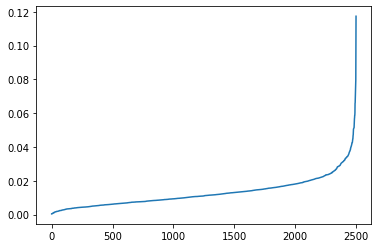

In [53]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [54]:
distances

array([0.00040117, 0.00040117, 0.00051837, ..., 0.07948294, 0.10533823,
       0.11731809])

In [55]:
indices

array([[   0, 1916],
       [   1, 1636],
       [   2,  250],
       ...,
       [2497,  623],
       [2498, 2290],
       [2499,  116]])

## Training

In [56]:
model = DBSCAN(eps=0.05)
model.fit(x)
y_pred = model.labels_.astype(np.int)

/home/nsl54/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


## Visualization of Clusters

Clusters:



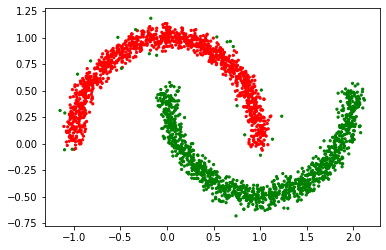

In [57]:
colors = np.array(['r','g'])
print("Clusters:\n")
plt.scatter(x1, x2, s=5, color=colors[y_pred])
plt.show()